# STATS 102 Final Project
Team members: Anar, Angarag, Temuulen
## Predicting whether a person has sleep disorder or not through logistic regression

Data info:
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Initial library imports

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

Loading our data. 

In the "BMI Category" column, there were "normal" bmi and "normal weight" bmi. Thus, we will be changing the latter to "normal".

In [37]:
dt = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
dt = dt.assign(BMI_Category=lambda x: x['BMI Category'].map({'Obese': "Obese", 'Normal': 'Normal', 'Overweight': 'Overweight', 'Normal Weight': 'Normal'}))
dt.drop(columns = "BMI Category", inplace= True)

In [38]:
dt.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'BMI_Category'],
      dtype='object')

In [39]:
dt.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,None,Overweight
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,None,Normal
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,None,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,Obese
4,5,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,Obese
5,6,Male,28,Software Engineer,5.9,4,30,8,140/90,85,3000,Insomnia,Obese
6,7,Male,29,Teacher,6.3,6,40,7,140/90,82,3500,Insomnia,Obese
7,8,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,None,Normal
8,9,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,None,Normal
9,10,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,None,Normal


In [40]:
dt.describe().round(2)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


In [41]:
dt.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BMI_Category               0
dtype: int64

There is no NaN values in our dataset

In [42]:
dt['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

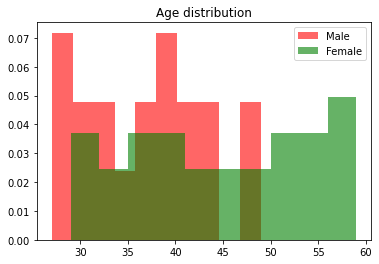

In [43]:
# Check the distribution of 'Age' column
df_ga = dt.groupby(['Age', 'Gender']).size().reset_index(name='count')

# Select data for male and female
df_m = df_ga[df_ga['Gender'] == 'Male']
df_f = df_ga[df_ga['Gender'] == 'Female']

plt.hist(data=df_m, x='Age', color='red', alpha=0.6, density=True, label='Male')
plt.hist(data=df_f, x='Age', color='green', alpha=0.6, density=True, label='Female')
plt.title('Age distribution')
plt.legend()
plt.show()


Changing the data to different groups

For blood pressure:
- Ideal blood pressure systolic (upper number) : less than 120 , diastolic (bottom number) : less than 80

- Normal systolic (upper number) : in range (120 - 129) , diastolic (bottom number) : in range (80 - 84)

- Otherwise, blood pressure is high (which is 1)

In [44]:
dt['Blood Pressure']=dt['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
for i in dt[["Age", "Heart Rate", "Daily Steps", "Sleep Duration", "Physical Activity Level"]]: 
	dt[i] = dt[i] / dt[i].abs().max() 

Converting non-numeric data (String or Boolean) into numbers and dropping "Person ID" since it is useless.

In [45]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dt.drop(['Person ID'], axis=1, inplace=True)
categories=['Gender','Occupation','BMI_Category','Sleep Disorder']
for label in categories:
    dt[label]=LE.fit_transform(dt[label])

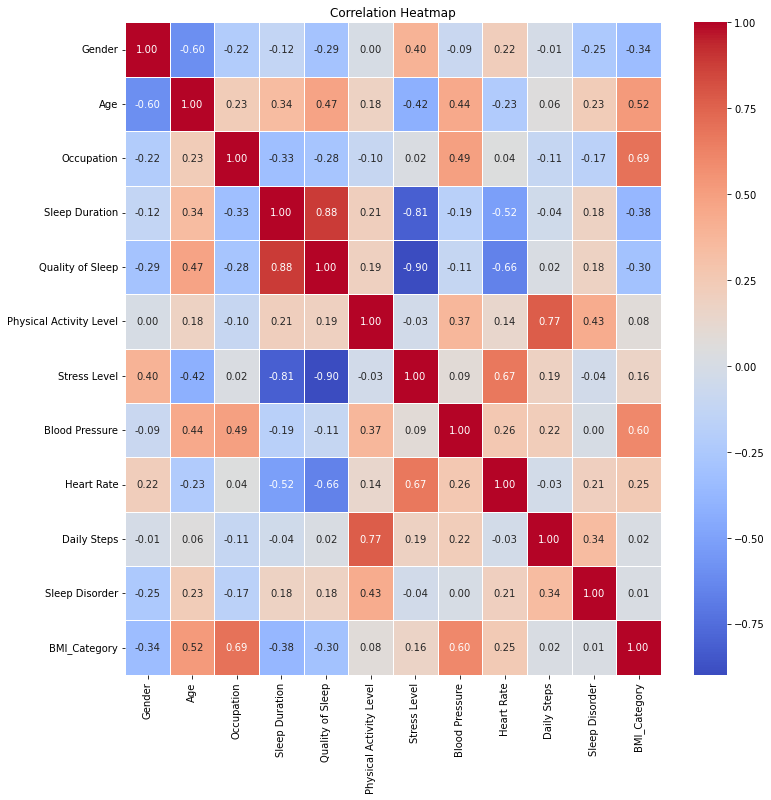

In [46]:
matrix = dt.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [50]:
dt.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Category
0,1,0.457627,9,0.717647,6,0.466667,6,0,0.895349,0.42,1,2
1,1,0.474576,1,0.729412,6,0.666667,8,0,0.872093,1.00,1,0
2,1,0.474576,1,0.729412,6,0.666667,8,0,0.872093,1.00,1,0
3,1,0.474576,6,0.694118,4,0.333333,8,1,0.988372,0.30,2,1
4,1,0.474576,6,0.694118,4,0.333333,8,1,0.988372,0.30,2,1


Splitting our data into 75,25 for training and testing.

In [47]:
x = dt.drop(columns=['Sleep Disorder'])  # Drop the target feature from the feature matrix
y = dt['Sleep Disorder']         #this is choosing the Sleep Disorder feature as the target 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=123,shuffle=True)

Testing our model and checking it's accuracy.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(max_iter=1000).fit(x_train,y_train)

y_model = model.predict(x_test)
print(accuracy_score(y_test, y_model))
print(f"Training score: {round(model.score(x_train,y_train)*100,2)}")
print(f"Testing score: {round(model.score(x_test,y_test)*100,2)}")

0.8936170212765957
Training score: 87.86
Testing score: 89.36


Haven't implemented our input feature yet.